In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# 2) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from IPython.display import display
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 3) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor 
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score # accuracy of classification
#for accurace of regression use model.score or cross_val_score

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 4) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
# from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# 1) Starting with Data
* Check values and its dtypes and NaNs

In [2]:
df = pd.read_csv('Cleaned_Data.csv', encoding='utf-8')
df # check df data

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,...,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date
0,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.652889,...,67,0.03110,0.904,0.594983,0.001830,0.0471,-7.105,0.1210,4.839934,2005-07-04
1,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.693147,...,81,0.02490,0.774,0.608678,0.001830,0.2420,-3.914,0.1140,4.970091,2003-11-13
2,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.098612,...,21,0.00238,0.664,0.564177,0.000000,0.0598,-6.583,0.1991,4.607757,2003-06-23
3,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.386294,...,76,0.20100,0.892,0.538830,0.000234,0.0521,-6.055,0.1410,4.624698,2002-11-04
4,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.609438,...,0,0.05610,0.853,0.473747,0.000000,0.3130,-4.596,0.0713,4.561835,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266293,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.532599,...,58,0.02230,0.380,0.430483,0.001830,0.0940,-5.493,0.0313,4.855275,2005-11-11
266294,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.543295,...,61,0.00415,0.401,0.534151,0.000000,0.0916,-7.554,0.0404,5.133849,1995-01-01
266295,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.553877,...,58,0.00192,0.513,0.598837,0.000003,0.4609,-5.428,0.0299,4.614645,2002-02-25
266296,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.564348,...,0,0.01310,0.381,0.611937,0.000000,0.3180,-7.123,0.1440,5.273000,2014-10-13


In [3]:
df.info() # check datatypes all seems great except date lets parse it then decompose it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266298 entries, 0 to 266297
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  266298 non-null  object 
 1   collaborative         266298 non-null  bool   
 2   modified_at           266298 non-null  float64
 3   num_tracks            266298 non-null  int64  
 4   num_albums            266298 non-null  float64
 5   num_followers         266298 non-null  float64
 6   num_edits             266298 non-null  float64
 7   playlist_duration_ms  266298 non-null  float64
 8   num_artists           266298 non-null  float64
 9   pos                   266298 non-null  float64
 10  track_name            266298 non-null  object 
 11  album_name            266298 non-null  object 
 12  artist_name           266298 non-null  object 
 13  track_duration_ms     266298 non-null  float64
 14  Popularity            266298 non-null  int64  
 15  

In [4]:
df.describe() # all numeric data seems good

,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
count,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000,266298.000000
mean,21.116902,109.707606,4.160086,1.479061,2.919594,16.849740,3.859833,3.542425,12.331253,35.700846,0.226965,0.606303,0.491795,0.000465,0.177422,-7.036758,0.078147,4.782238
std,0.020865,62.853635,0.710959,0.802819,1.002258,0.707374,0.711456,1.105419,0.222344,28.993198,0.265449,0.158601,0.130421,0.000752,0.117550,2.972503,0.058558,0.236278
min,21.065236,5.000000,2.219635,1.000000,1.098612,14.863101,2.030796,0.652889,11.799052,0.000000,0.000000,0.171000,0.146069,0.000000,0.000000,-14.251875,0.000000,4.103309
25%,21.106122,57.000000,3.713572,1.000000,2.079442,16.388206,3.433987,2.890372,12.197506,0.000000,0.020800,0.501000,0.414755,0.000000,0.094400,-8.628750,0.035600,4.610558
50%,21.125956,100.000000,4.276666,1.000000,2.944439,16.964330,3.951244,3.713572,12.323300,40.000000,0.104000,0.614000,0.516410,0.000003,0.126000,-6.454000,0.050100,4.800161
75%,21.133379,157.000000,4.709530,2.000000,3.688879,17.404943,4.369448,4.382027,12.463142,62.000000,0.357000,0.721000,0.593879,0.000732,0.241000,-4.880000,0.101000,4.948724
max,21.135041,248.000000,5.455321,3.500000,5.187386,18.197211,5.298317,5.513429,12.861596,92.000000,0.861300,0.991000,0.693147,0.001830,0.460900,0.743125,0.199100,5.451382


In [5]:
df.isnull().sum().sum() # Should be 0

0

In [6]:
df['parsed_Release_date'] = pd.to_datetime(df['parsed_Release_date'], infer_datetime_format=True)
print(df['parsed_Release_date'].dtype)
df.info()

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266298 entries, 0 to 266297
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   name                  266298 non-null  object        
 1   collaborative         266298 non-null  bool          
 2   modified_at           266298 non-null  float64       
 3   num_tracks            266298 non-null  int64         
 4   num_albums            266298 non-null  float64       
 5   num_followers         266298 non-null  float64       
 6   num_edits             266298 non-null  float64       
 7   playlist_duration_ms  266298 non-null  float64       
 8   num_artists           266298 non-null  float64       
 9   pos                   266298 non-null  float64       
 10  track_name            266298 non-null  object        
 11  album_name            266298 non-null  object        
 12  artist_name           266298 non-null  obje

In [7]:
df['parsed_Release_date_day'] = df['parsed_Release_date'].dt.day
df['parsed_Release_date_month'] = df['parsed_Release_date'].dt.month
df['parsed_Release_date_year'] = df['parsed_Release_date'].dt.year
df

,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date,parsed_Release_date_day,parsed_Release_date_month,parsed_Release_date_year
0,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.652889,...,0.594983,0.001830,0.0471,-7.105,0.1210,4.839934,2005-07-04,4,7,2005
1,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.693147,...,0.608678,0.001830,0.2420,-3.914,0.1140,4.970091,2003-11-13,13,11,2003
2,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.098612,...,0.564177,0.000000,0.0598,-6.583,0.1991,4.607757,2003-06-23,23,6,2003
3,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.386294,...,0.538830,0.000234,0.0521,-6.055,0.1410,4.624698,2002-11-04,4,11,2002
4,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.609438,...,0.473747,0.000000,0.3130,-4.596,0.0713,4.561835,2000-01-01,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266293,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.532599,...,0.430483,0.001830,0.0940,-5.493,0.0313,4.855275,2005-11-11,11,11,2005
266294,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.543295,...,0.534151,0.000000,0.0916,-7.554,0.0404,5.133849,1995-01-01,1,1,1995
266295,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.553877,...,0.598837,0.000003,0.4609,-5.428,0.0299,4.614645,2002-02-25,25,2,2002
266296,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.564348,...,0.611937,0.000000,0.3180,-7.123,0.1440,5.273000,2014-10-13,13,10,2014


In [8]:
df.rename(columns = {'name':'playlist_name'}, inplace = True)

In [9]:
df = df.drop('parsed_Release_date', axis=1)
df.to_csv('Encoded_FeatEng_data.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266298 entries, 0 to 266297
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   playlist_name              266298 non-null  object 
 1   collaborative              266298 non-null  bool   
 2   modified_at                266298 non-null  float64
 3   num_tracks                 266298 non-null  int64  
 4   num_albums                 266298 non-null  float64
 5   num_followers              266298 non-null  float64
 6   num_edits                  266298 non-null  float64
 7   playlist_duration_ms       266298 non-null  float64
 8   num_artists                266298 non-null  float64
 9   pos                        266298 non-null  float64
 10  track_name                 266298 non-null  object 
 11  album_name                 266298 non-null  object 
 12  artist_name                266298 non-null  object 
 13  track_duration_ms          26

# 2) Encoding
* 1) convert boolean (False -> 0, True -> 1) and break Texts Then train_test_split
* 2) Ordinal and Nominal (high or low cardinalitys) and Target Encoding

Note: if very high cardinality then use: **Label / Freq / Hash / N-binary Encoding**

### 1) convert boolean (False -> 0, True -> 1) and break Texts Then train_test_split

In [10]:
df = pd.read_csv('Encoded_FeatEng_data.csv', encoding='utf-8')
df

,playlist_name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date_day,parsed_Release_date_month,parsed_Release_date_year
0,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.652889,...,0.904,0.594983,0.001830,0.0471,-7.105,0.1210,4.839934,4,7,2005
1,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.693147,...,0.774,0.608678,0.001830,0.2420,-3.914,0.1140,4.970091,13,11,2003
2,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.098612,...,0.664,0.564177,0.000000,0.0598,-6.583,0.1991,4.607757,23,6,2003
3,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.386294,...,0.892,0.538830,0.000234,0.0521,-6.055,0.1410,4.624698,4,11,2002
4,Throwbacks,False,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.609438,...,0.853,0.473747,0.000000,0.3130,-4.596,0.0713,4.561835,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266293,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.532599,...,0.380,0.430483,0.001830,0.0940,-5.493,0.0313,4.855275,11,11,2005
266294,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.543295,...,0.401,0.534151,0.000000,0.0916,-7.554,0.0404,5.133849,1,1,1995
266295,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.553877,...,0.513,0.598837,0.000003,0.4609,-5.428,0.0299,4.614645,25,2,2002
266296,other,False,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.564348,...,0.381,0.611937,0.000000,0.3180,-7.123,0.1440,5.273000,13,10,2014


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266298 entries, 0 to 266297
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   playlist_name              266298 non-null  object 
 1   collaborative              266298 non-null  bool   
 2   modified_at                266298 non-null  float64
 3   num_tracks                 266298 non-null  int64  
 4   num_albums                 266298 non-null  float64
 5   num_followers              266298 non-null  float64
 6   num_edits                  266298 non-null  float64
 7   playlist_duration_ms       266298 non-null  float64
 8   num_artists                266298 non-null  float64
 9   pos                        266298 non-null  float64
 10  track_name                 266298 non-null  object 
 11  album_name                 266298 non-null  object 
 12  artist_name                266298 non-null  object 
 13  track_duration_ms          26

In [12]:
indices = np.where(df['collaborative'] == True)[0]
df.iloc[indices, :]

,playlist_name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date_day,parsed_Release_date_month,parsed_Release_date_year
5977,Dave,True,21.085045,81,3.044522,1.0,2.197225,17.107685,2.030796,0.652889,...,0.711,0.387980,0.000000,0.1250,-14.251875,0.0525,4.744828,9,11,1993
5978,Dave,True,21.085045,81,3.044522,1.0,2.197225,17.107685,2.030796,0.693147,...,0.495,0.410784,0.000004,0.1160,-8.116000,0.0256,4.358809,30,4,1996
5979,Dave,True,21.085045,81,3.044522,1.0,2.197225,17.107685,2.030796,1.098612,...,0.711,0.522359,0.000020,0.0791,-6.484000,0.0286,4.839238,27,9,1994
5980,Dave,True,21.085045,81,3.044522,1.0,2.197225,17.107685,2.030796,1.386294,...,0.329,0.412110,0.000423,0.1010,-8.521000,0.0394,5.132227,11,9,2012
5981,Dave,True,21.085045,81,3.044522,1.0,2.197225,17.107685,2.030796,1.609438,...,0.430,0.231112,0.001830,0.3900,-12.732000,0.0319,4.637347,11,9,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264371,Roadtrip,True,21.128897,166,4.927254,1.0,2.197225,17.413870,4.682131,5.087596,...,0.673,0.464991,0.000000,0.1100,-8.388000,0.0305,4.811770,2,8,2013
264372,Roadtrip,True,21.128897,166,4.927254,1.0,2.197225,17.413870,4.682131,5.093750,...,0.359,0.500169,0.001830,0.0555,-7.060000,0.0349,4.724809,1,1,2012
264373,Roadtrip,True,21.128897,166,4.927254,1.0,2.197225,17.413870,4.682131,5.099866,...,0.566,0.523544,0.000000,0.0553,-7.507000,0.0710,4.999062,1,7,1972
264374,Roadtrip,True,21.128897,166,4.927254,1.0,2.197225,17.413870,4.682131,5.105945,...,0.489,0.484276,0.000005,0.3490,-9.057000,0.1230,4.364054,28,2,2013


In [13]:
# convert boolean, False -> 0, True -> 1
indices_true = np.where(df['collaborative'] == True)[0]
indices_false = np.where(df['collaborative'] == False)[0]
df.iloc[indices_true, 1] = 1
df.iloc[indices_false, 1] = 0
print(len(indices_true))
df.info()

5726
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266298 entries, 0 to 266297
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   playlist_name              266298 non-null  object 
 1   collaborative              266298 non-null  object 
 2   modified_at                266298 non-null  float64
 3   num_tracks                 266298 non-null  int64  
 4   num_albums                 266298 non-null  float64
 5   num_followers              266298 non-null  float64
 6   num_edits                  266298 non-null  float64
 7   playlist_duration_ms       266298 non-null  float64
 8   num_artists                266298 non-null  float64
 9   pos                        266298 non-null  float64
 10  track_name                 266298 non-null  object 
 11  album_name                 266298 non-null  object 
 12  artist_name                266298 non-null  object 
 13  track_duration_ms       

In [14]:
df['collaborative'] = df['collaborative'].astype('int64')
df

,playlist_name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date_day,parsed_Release_date_month,parsed_Release_date_year
0,Throwbacks,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.652889,...,0.904,0.594983,0.001830,0.0471,-7.105,0.1210,4.839934,4,7,2005
1,Throwbacks,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.693147,...,0.774,0.608678,0.001830,0.2420,-3.914,0.1140,4.970091,13,11,2003
2,Throwbacks,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.098612,...,0.664,0.564177,0.000000,0.0598,-6.583,0.1991,4.607757,23,6,2003
3,Throwbacks,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.386294,...,0.892,0.538830,0.000234,0.0521,-6.055,0.1410,4.624698,4,11,2002
4,Throwbacks,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.609438,...,0.853,0.473747,0.000000,0.3130,-4.596,0.0713,4.561835,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266293,other,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.532599,...,0.380,0.430483,0.001830,0.0940,-5.493,0.0313,4.855275,11,11,2005
266294,other,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.543295,...,0.401,0.534151,0.000000,0.0916,-7.554,0.0404,5.133849,1,1,1995
266295,other,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.553877,...,0.513,0.598837,0.000003,0.4609,-5.428,0.0299,4.614645,25,2,2002
266296,other,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.564348,...,0.381,0.611937,0.000000,0.3180,-7.123,0.1440,5.273000,13,10,2014


In [15]:
# break texts
columns = df.columns
categorical_columns = [] # object
numeric_columns = [] # int or float

for col in columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric_columns.append(col)
categorical_columns

['playlist_name', 'track_name', 'album_name', 'artist_name']

In [16]:
df[categorical_columns]

,playlist_name,track_name,album_name,artist_name
0,Throwbacks,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,Missy Elliott
1,Throwbacks,Toxic,In The Zone,Britney Spears
2,Throwbacks,Crazy In Love (feat. Jay-Z),Dangerously In Love (Alben für die Ewigkeit),Beyoncé
3,Throwbacks,Rock Your Body,Justified,Justin Timberlake
4,Throwbacks,It Wasn't Me,Hot Shot (International Version #2),Shaggy
...,...,...,...,...
266293,other,Uninvited,The Collection (Standard Edition),Alanis Morissette
266294,other,You Learn - 2015 Remaster,Jagged Little Pill (2015 Remaster),Alanis Morissette
266295,other,Hands Clean,Under Rug Swept,Alanis Morissette
266296,other,Cecilia And The Satellite,Andrew McMahon In The Wilderness,Andrew McMahon in the Wilderness


In [17]:
for col in categorical_columns: 
    print(df[col].unique()) 
    print(df[col].nunique())
    print()

['Throwbacks' 'Awesome Playlist' 'korean' ... 'Miles' 'Mellow Mood'
 'mix up']
2698

['Lose Control (feat. Ciara & Fat Man Scoop)' 'Toxic'
 'Crazy In Love (feat. Jay-Z)' ... 'Living in the Moment'
 'Pictures Of You - Remix' 'Close to Me - Closest Mix']
76268

['The Cookbook' 'In The Zone'
 'Dangerously In Love (Alben für die Ewigkeit)' ...
 'Mind of a Menace 3 (Reloaded)' 'Galore - The Singles 1987-1997'
 'Mixed Up']
43003

['Missy Elliott' 'Britney Spears' 'Beyoncé' ... 'Neef Buck' 'LBC Movement'
 'A$AP ANT']
20151



**Note: **

* Here I won't break Text as no extra info if i break Text 

ex: if it was 'playlist 1' so break text have info but its playlist name or track name that i predict so no info if i break it

* Also All categorical columns are nominal (no ordinal variables) and have high cardinality (large uniques) so use **freq encoder**

In [18]:
df[numeric_columns]

,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,playlist_duration_ms,num_artists,pos,track_duration_ms,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,parsed_Release_date_day,parsed_Release_date_month,parsed_Release_date_year
0,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.652889,12.332106,...,0.904,0.594983,0.001830,0.0471,-7.105,0.1210,4.839934,4,7,2005
1,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,0.693147,12.200060,...,0.774,0.608678,0.001830,0.2420,-3.914,0.1140,4.970091,13,11,2003
2,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.098612,12.371307,...,0.664,0.564177,0.000000,0.0598,-6.583,0.1991,4.607757,23,6,2003
3,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.386294,12.496003,...,0.892,0.538830,0.000234,0.0521,-6.055,0.1410,4.624698,4,11,2002
4,0,21.124337,52,3.871201,1.0,1.945910,16.260672,3.637586,1.609438,12.335349,...,0.853,0.473747,0.000000,0.3130,-4.596,0.0713,4.561835,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266293,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.532599,12.528884,...,0.380,0.430483,0.001830,0.0940,-5.493,0.0313,4.855275,11,11,2005
266294,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.543295,12.386897,...,0.401,0.534151,0.000000,0.0916,-7.554,0.0404,5.133849,1,1,1995
266295,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.553877,12.503956,...,0.513,0.598837,0.000003,0.4609,-5.428,0.0299,4.614645,25,2,2002
266296,0,21.074520,97,4.043051,1.0,2.302585,16.931187,2.890372,4.564348,12.318865,...,0.381,0.611937,0.000000,0.3180,-7.123,0.1440,5.273000,13,10,2014


In [19]:
# df.to_csv('Encoded_FeatEng_data.csv', index=False)

In [20]:
# Select Relevent Data
dropped_cols = ['modified_at','num_tracks', 'num_albums', 'num_followers', 'num_edits','playlist_duration_ms', 'num_artists', 'pos', 'parsed_Release_date_day', 'parsed_Release_date_month', 'parsed_Release_date_year']
undropped_df = df.copy()
df = df.drop(dropped_cols, axis=1)

In [21]:
y = df['track_name'].copy()
X = df.drop('track_name', axis=1).copy()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.90, test_size=0.10, random_state=5)

### 2) Ordinal and Nominal (high or low cardinalitys) and Target Encoding

In [22]:
columns = df.columns
categorical_columns = [] # object
numeric_columns = [] # int or float

for col in columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric_columns.append(col)

In [23]:
# Categorical Features
categorical_feat = categorical_columns.copy() # as filtering have no target
categorical_feat.remove('track_name')

good_label_cols = []
for col in categorical_feat:
    if set(X_valid[col]).issubset(set(X_train[col])):
        good_label_cols.append(col)
        
bad_label_cols = list(set(categorical_feat) - set(good_label_cols))
print(good_label_cols)
print()
print(bad_label_cols)

['playlist_name']

['artist_name', 'album_name']


Good labels is playlist_name only and i Took 90% of Data as train so drop artist_name and album_name they are not good

(my intuation is i use audio analysis features to predict track_name but artist_name and album_name could not help that much)

In [24]:
label_X_train = X_train[categorical_feat]
num_X_train = X_train[numeric_columns]
label_X_valid = X_valid[categorical_feat]
num_X_valid = X_valid[numeric_columns]

In [25]:
# high cardinality >10 unique values so use freq_encoder / ordinal_encoder
#freq_encoder is better

high_cardinality_cols = good_label_cols
high_cardinality_cols_bad = ['track_name']

for col in high_cardinality_cols:
    listo = label_X_train[col].value_counts(normalize=True)
    label_X_train['encoded_'+ col] = label_X_train[col].apply(lambda x: listo[x])
    label_X_valid['encoded_'+col] = label_X_valid[col].apply(lambda x: listo[x]) # prevents data leakage

# for col in high_cardinality_cols_bad: # bad cols
#     listo = label_X_train[col].value_counts(normalize=True)
#     label_X_train['encoded_'+ col] = label_X_train[col].apply(lambda x: listo[x])
#     listo = label_X_valid[col].value_counts(normalize=True)
#     label_X_valid['encoded_'+ col] = label_X_valid[col].apply(lambda x: listo[x])
    
label_X_train


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,playlist_name,album_name,artist_name,encoded_playlist_name
120411,hoco,Fetty Wap (Deluxe),Fetty Wap,0.000747
201119,Josh Garrels,Love & War & The Sea In Between,Josh Garrels,0.000255
208267,Animal,Toxicity,System Of A Down,0.000113
257191,My music,Selfish Machines (Reissue),Pierce The Veil,0.000772
104121,Good Country,16 Biggest Hits,Alan Jackson,0.000572
...,...,...,...,...
136592,country,Three Chord Country and American Rock & Roll,Keith Anderson,0.012175
232422,Autumn,Phase,Jack Garratt,0.000184
124605,Pitbull,Global Warming: Meltdown (Deluxe Version),Pitbull,0.000638
20463,electronic,Get Down,DSKO,0.000638


In [26]:
label_X_train_high_card = label_X_train.iloc[:, -len(high_cardinality_cols):]
label_X_valid_high_card = label_X_valid.iloc[:, -len(high_cardinality_cols):]
label_X_train_high_card

,encoded_playlist_name
120411,0.000747
201119,0.000255
208267,0.000113
257191,0.000772
104121,0.000572
...,...
136592,0.012175
232422,0.000184
124605,0.000638
20463,0.000638


In [27]:
# lets concat label_X_train with X_train_num
X_train_model = pd.concat([num_X_train, label_X_train_high_card], axis=1)
X_train_model

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,encoded_playlist_name
120411,0,12.269301,66,0.004190,0.748,0.554460,0.000000,0.1470,-3.103,0.0531,4.860409,0.000747
201119,0,11.935372,30,0.292000,0.593,0.402126,0.001410,0.1250,-8.306,0.0248,4.355464,0.000255
208267,0,12.256010,5,0.000353,0.420,0.657002,0.000747,0.1220,-3.899,0.1210,4.853623,0.000113
257191,0,12.486194,61,0.000158,0.434,0.645531,0.000003,0.3210,-3.967,0.0468,5.017584,0.000772
104121,0,12.468029,59,0.131000,0.681,0.541743,0.000002,0.1130,-5.918,0.0248,4.842051,0.000572
...,...,...,...,...,...,...,...,...,...,...,...,...
136592,0,12.133077,64,0.035300,0.561,0.539996,0.000000,0.1220,-3.341,0.0291,5.031019,0.012175
232422,0,12.479354,0,0.002760,0.607,0.468127,0.001830,0.1090,-7.560,0.1250,4.653379,0.000184
124605,0,12.305076,33,0.012700,0.633,0.640801,0.000000,0.1820,-4.507,0.0425,4.859588,0.000638
20463,0,12.289752,0,0.006830,0.701,0.654926,0.001830,0.1180,-4.386,0.0370,4.745245,0.000638


In [28]:
# lets concat label_X_valid with X_valid_num
X_valid_model = pd.concat([num_X_valid, label_X_valid_high_card], axis=1)
X_valid_model

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,encoded_playlist_name
1973,0,12.268611,61,0.10400,0.469,0.572673,0.000000,0.0753,-4.741000,0.1960,5.323512,0.001782
190467,0,12.398514,40,0.14100,0.669,0.557900,0.000000,0.1850,-7.108000,0.0428,4.816492,0.002378
114341,0,12.459943,83,0.06440,0.828,0.400118,0.001830,0.1280,-9.744000,0.0276,4.797038,0.000542
105516,0,12.347286,63,0.18800,0.605,0.475613,0.000000,0.0982,-7.063000,0.0278,4.795080,0.001727
114675,0,12.843710,43,0.05670,0.474,0.377751,0.001830,0.0871,-10.160000,0.0304,4.852749,0.002741
...,...,...,...,...,...,...,...,...,...,...,...,...
165615,0,12.515618,57,0.58800,0.725,0.245296,0.000000,0.0869,-14.251875,0.0704,4.794037,0.000246
102017,0,12.206043,73,0.69400,0.705,0.475613,0.000000,0.2340,-5.728000,0.0729,4.949171,0.000501
94162,0,12.248634,47,0.11900,0.794,0.539413,0.000000,0.0838,-5.531000,0.1220,4.934675,0.000622
11945,0,12.861596,0,0.15300,0.365,0.494086,0.000000,0.1110,-5.784000,0.0296,4.913383,0.002362


I couldnt use LabelEncoder or even OrdinalEncoder or Freq_encoder for Target_variable

so I will allow data leakage for Target as I cant do it more better, I'm sorry

In [29]:
# # # Target/Label Encoder
# # LabelEncoder used in pipeline but now lets try it manually

# target_label_cols = ['track_name']

# # Apply ordinal encoder 
# # label_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = np.nan) # ordinal encoder bcz i cant use label encoder
# label_encoder = LabelEncoder() 

# y = pd.DataFrame(label_encoder.fit_transform(y), index=y.index) # or fit then transform transform
# y #data now from labels to numbers

Recomendation system doesnt have Label/Target column:

So dont use LabelEncoder for it !!

In [30]:
# y_train = y.iloc[y_train.index, :]
# y_train = y_train.squeeze()
# y_valid = y.iloc[y_valid.index, :]
# y_valid = y_valid.squeeze()
# y_train

In [31]:
X_train_model.describe()

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,encoded_playlist_name
count,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000
mean,0.021509,12.331168,35.705251,0.227064,0.606067,0.491675,0.000466,0.177446,-7.041227,0.078147,4.782145,0.001880
std,0.145074,0.222402,28.993649,0.265539,0.158672,0.130520,0.000753,0.117578,2.975658,0.058562,0.236444,0.004086
min,0.000000,11.799052,0.000000,0.000000,0.171000,0.146069,0.000000,0.000000,-14.251875,0.000000,4.103309,0.000013
25%,0.000000,12.197370,0.000000,0.020800,0.501000,0.414755,0.000000,0.094400,-8.636000,0.035600,4.609799,0.000309
50%,0.000000,12.323256,40.000000,0.104000,0.613000,0.516410,0.000003,0.126000,-6.460000,0.050100,4.799601,0.000601
75%,0.000000,12.463247,62.000000,0.358000,0.721000,0.593879,0.000744,0.241000,-4.881000,0.101000,4.948732,0.001227
max,1.000000,12.861596,92.000000,0.861300,0.991000,0.693147,0.001830,0.460900,0.743125,0.199100,5.451382,0.023587


In [32]:
X_train_model.describe().loc[:, 'track_duration_ms':]

,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,encoded_playlist_name
count,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000,239668.000000
mean,12.331168,35.705251,0.227064,0.606067,0.491675,0.000466,0.177446,-7.041227,0.078147,4.782145,0.001880
std,0.222402,28.993649,0.265539,0.158672,0.130520,0.000753,0.117578,2.975658,0.058562,0.236444,0.004086
min,11.799052,0.000000,0.000000,0.171000,0.146069,0.000000,0.000000,-14.251875,0.000000,4.103309,0.000013
25%,12.197370,0.000000,0.020800,0.501000,0.414755,0.000000,0.094400,-8.636000,0.035600,4.609799,0.000309
50%,12.323256,40.000000,0.104000,0.613000,0.516410,0.000003,0.126000,-6.460000,0.050100,4.799601,0.000601
75%,12.463247,62.000000,0.358000,0.721000,0.593879,0.000744,0.241000,-4.881000,0.101000,4.948732,0.001227
max,12.861596,92.000000,0.861300,0.991000,0.693147,0.001830,0.460900,0.743125,0.199100,5.451382,0.023587


So Scale all variables even Dancebility doesnt have mean= 0 std=1 so scale all except collaborative variable

In [33]:
X_valid_model.describe()

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,encoded_playlist_name
count,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000,26630.000000
mean,0.021442,12.332014,35.661209,0.226081,0.608432,0.492872,0.000456,0.177203,-6.996546,0.078151,4.783077,0.001914
std,0.144855,0.221826,28.989652,0.264644,0.157953,0.129525,0.000746,0.117307,2.943713,0.058526,0.234787,0.004134
min,0.000000,11.799052,0.000000,0.000000,0.171000,0.146069,0.000000,0.000000,-14.251875,0.000000,4.103309,0.000013
25%,0.000000,12.199587,0.000000,0.020900,0.505000,0.416075,0.000000,0.094200,-8.570000,0.035600,4.614420,0.000305
50%,0.000000,12.324771,40.000000,0.103000,0.616000,0.517603,0.000003,0.126000,-6.411000,0.050000,4.804001,0.000601
75%,0.000000,12.462163,62.000000,0.354000,0.722000,0.593879,0.000662,0.241000,-4.877000,0.101000,4.948703,0.001231
max,1.000000,12.861596,91.000000,0.861300,0.988000,0.692647,0.001830,0.460900,0.441000,0.199100,5.394423,0.023587


**Note:**

At Testing drop ['artist_name', 'album_name'] then freq_encode 'playlist_name' (after u rename it) then pass on pipeline

# 3) Feature Engineering

Note: **StandardScaler First for clusters_feature or PCA or modeling**

* 1) K_means cluster to get new feature (unsupervised learning)
* 2) PCA to make dimension reduction (unsupervised learning)
* 3) Select Features have MI > 0.2 or percentile
* 4) Add new features after you make baseline model First

In [34]:
X_train_model = X_train_model.drop('encoded_playlist_name', axis=1)
X_valid_model = X_valid_model.drop('encoded_playlist_name', axis=1)
X_train_model

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
120411,0,12.269301,66,0.004190,0.748,0.554460,0.000000,0.1470,-3.103,0.0531,4.860409
201119,0,11.935372,30,0.292000,0.593,0.402126,0.001410,0.1250,-8.306,0.0248,4.355464
208267,0,12.256010,5,0.000353,0.420,0.657002,0.000747,0.1220,-3.899,0.1210,4.853623
257191,0,12.486194,61,0.000158,0.434,0.645531,0.000003,0.3210,-3.967,0.0468,5.017584
104121,0,12.468029,59,0.131000,0.681,0.541743,0.000002,0.1130,-5.918,0.0248,4.842051
...,...,...,...,...,...,...,...,...,...,...,...
136592,0,12.133077,64,0.035300,0.561,0.539996,0.000000,0.1220,-3.341,0.0291,5.031019
232422,0,12.479354,0,0.002760,0.607,0.468127,0.001830,0.1090,-7.560,0.1250,4.653379
124605,0,12.305076,33,0.012700,0.633,0.640801,0.000000,0.1820,-4.507,0.0425,4.859588
20463,0,12.289752,0,0.006830,0.701,0.654926,0.001830,0.1180,-4.386,0.0370,4.745245


In [35]:
#scale but its already scaled
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
# std_scale.fit(X_train_model)
i = 0
for col in X_train_model.columns:
    if not (col == 'collaborative'): # StandartScaler or any method 
        print(col)
        listo = np.asarray(X_train_model[col]) #array
        listo = listo.reshape(-1, 1)
        listo_testo = np.asarray(X_valid_model[col]) #array
        listo_testo= listo_testo.reshape(-1, 1)
        X_train_model[col] = std_scale.fit_transform(listo)
        X_valid_model[col] = std_scale.transform(listo_testo) #by this no data leakage (no info leakage), 'Same for Valid Data'
    i = i + 1
X_train_model.describe()

track_duration_ms
Popularity
Acousticness
Danceability
Energy
Instrumentalness
Liveness
Loudness
Speechiness
Tempo


,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
count,239668.000000,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05
mean,0.021509,-4.157571e-15,1.518221e-16,-1.641256e-16,-3.319422e-16,4.243147e-16,-3.430153e-17,2.312463e-17,-5.919831e-16,-1.176984e-17,2.104104e-15
std,0.145074,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.392596e+00,-1.231488e+00,-8.551083e-01,-2.741937e+00,-2.647916e+00,-6.183739e-01,-1.509187e+00,-2.423217e+00,-1.334436e+00,-2.871032e+00
25%,0.000000,-6.016084e-01,-1.231488e+00,-7.767767e-01,-6.621665e-01,-5.893334e-01,-6.183739e-01,-7.063124e-01,-5.359410e-01,-7.265315e-01,-7.289075e-01
50%,0.000000,-3.557937e-02,1.481276e-01,-4.634505e-01,4.369508e-02,1.895122e-01,-6.141231e-01,-4.375534e-01,1.953275e-01,-4.789301e-01,7.383102e-02
75%,0.000000,5.938730e-01,9.069160e-01,4.930983e-01,7.243473e-01,7.830553e-01,3.699571e-01,5.405251e-01,7.259676e-01,3.902362e-01,7.045538e-01
max,1.000000,2.385003e+00,1.941628e+00,2.388496e+00,2.425978e+00,1.543614e+00,1.812602e+00,2.410781e+00,2.616016e+00,2.065388e+00,2.830436e+00


#### a) Cluster Feature

In [36]:
# Create cluster feature
kmeans = KMeans(n_clusters=8, random_state=5) # hyperparameter !! Try and Error (Experiments) 1 -> 23 (12)
# Elbow (optimization tech)

X_train_model_clusterd = X_train_model.copy()
X_valid_model_clusterd = X_valid_model.copy()

X_train_model_clusterd["Cluster"] = kmeans.fit_predict(X_train_model)
X_valid_model_clusterd["Cluster"] = kmeans.predict(X_valid_model) # prevent data leakage

X_train_model_clusterd["Cluster"] = X_train_model_clusterd["Cluster"].astype("int32")
X_valid_model_clusterd["Cluster"] = X_valid_model_clusterd["Cluster"].astype("int32")
X_train_model_clusterd

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Cluster
120411,0,-0.278179,1.044878,-0.839329,0.894510,0.481036,-0.618374,-0.258948,1.323484,-0.427702,0.331008,1
201119,0,-1.779648,-0.196776,0.244546,-0.082352,-0.686092,1.254673,-0.446058,-0.425041,-0.910952,-1.804578,5
208267,0,-0.337941,-1.059036,-0.853779,-1.172656,1.266679,0.373942,-0.471574,1.055979,0.731755,0.302306,7
257191,0,0.697052,0.872426,-0.854513,-1.084423,1.178797,-0.615040,1.220928,1.033127,-0.535281,0.995757,7
104121,0,0.615377,0.803445,-0.361770,0.472254,0.383603,-0.616182,-0.548119,0.377473,-0.910952,0.253365,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136592,0,-0.890693,0.975897,-0.722171,-0.284026,0.370220,-0.618374,-0.471574,1.243501,-0.837525,1.052578,7
232422,0,0.666298,-1.231488,-0.844714,0.005881,-0.180417,1.812602,-0.582139,-0.174339,0.800059,-0.544593,5
124605,0,-0.117321,-0.093305,-0.807281,0.169742,1.142552,-0.618374,0.038728,0.851654,-0.608707,0.327533,7
20463,0,-0.186225,-1.231488,-0.829387,0.598301,1.250775,1.812602,-0.505594,0.892318,-0.702625,-0.156061,5


In [37]:
X_valid_model_clusterd

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Cluster
1973,0,-0.281283,0.872426,-0.463451,-0.863841,0.620581,-0.618374,-0.868758,0.773016,2.012452,2.289632,7
190467,0,0.302810,0.148128,-0.324111,0.396626,0.507395,-0.618374,0.064243,-0.022440,-0.603585,0.145268,1
114341,0,0.579020,1.631214,-0.612582,1.398697,-0.701482,1.812602,-0.420543,-0.908296,-0.863139,0.062988,5
105516,0,0.072469,0.941406,-0.147112,-0.006724,-0.123062,-0.618374,-0.673993,-0.007317,-0.859724,0.054706,1
114675,0,2.304579,0.251599,-0.641579,-0.832330,-0.872845,1.812602,-0.768399,-1.048098,-0.815326,0.298609,5
...,...,...,...,...,...,...,...,...,...,...,...,...
165615,0,0.829353,0.734464,1.359264,0.749557,-1.887670,-0.618374,-0.770100,-2.423217,-0.132288,0.050297,4
102017,0,-0.562612,1.286310,1.758454,0.623510,-0.123062,-0.618374,0.480990,0.441324,-0.089598,0.706413,1
94162,0,-0.371106,0.389560,-0.406961,1.184418,0.365754,-0.618374,-0.796466,0.507528,0.748831,0.645105,2
11945,0,2.385003,-1.231488,-0.278919,-1.519284,0.018475,-0.618374,-0.565129,0.422505,-0.828987,0.555051,7


In [38]:
X_train_model_clusterd.describe() # Cluster_feature: ranges: 0-> n/2 and should scale it for modeling!!

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Cluster
count,239668.000000,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,2.396680e+05,239668.000000
mean,0.021509,-4.157571e-15,1.518221e-16,-1.641256e-16,-3.319422e-16,4.243147e-16,-3.430153e-17,2.312463e-17,-5.919831e-16,-1.176984e-17,2.104104e-15,3.145969
std,0.145074,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,2.228742
min,0.000000,-2.392596e+00,-1.231488e+00,-8.551083e-01,-2.741937e+00,-2.647916e+00,-6.183739e-01,-1.509187e+00,-2.423217e+00,-1.334436e+00,-2.871032e+00,0.000000
25%,0.000000,-6.016084e-01,-1.231488e+00,-7.767767e-01,-6.621665e-01,-5.893334e-01,-6.183739e-01,-7.063124e-01,-5.359410e-01,-7.265315e-01,-7.289075e-01,1.000000
50%,0.000000,-3.557937e-02,1.481276e-01,-4.634505e-01,4.369508e-02,1.895122e-01,-6.141231e-01,-4.375534e-01,1.953275e-01,-4.789301e-01,7.383102e-02,3.000000
75%,0.000000,5.938730e-01,9.069160e-01,4.930983e-01,7.243473e-01,7.830553e-01,3.699571e-01,5.405251e-01,7.259676e-01,3.902362e-01,7.045538e-01,5.000000
max,1.000000,2.385003e+00,1.941628e+00,2.388496e+00,2.425978e+00,1.543614e+00,1.812602e+00,2.410781e+00,2.616016e+00,2.065388e+00,2.830436e+00,7.000000


#### b) PCA

In [39]:
from IPython.display import display

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [40]:
# Create principal components
pca = PCA(random_state=5)

features = X_train_model.columns # apply PCA to all X_train Features

X_pca_train = pca.fit_transform(X_train_model)
X_pca_valid = pca.transform(X_valid_model)

# Convert to dataframe
# component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
component_names = []
for i in range(len(features)):
    component_names.append('PC' + str(i+1))
X_pca_train = pd.DataFrame(X_pca_train, columns=component_names)
X_pca_valid = pd.DataFrame(X_pca_valid, columns=component_names)
X_pca_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.713346,-0.608122,-0.810726,-0.917053,-0.022587,0.150899,0.209470,-0.533675,-0.169275,0.463205,-0.019191
1,1.498150,-0.315267,-0.110841,-0.232546,-1.603988,1.597978,1.301859,0.620655,0.257682,0.316783,-0.021975
2,-1.421661,1.147806,0.508055,0.095405,-1.034742,-0.280619,-0.531308,1.416121,0.072877,-0.000304,-0.026184
3,-1.853383,1.442150,0.229241,-0.946114,1.473203,0.217755,-0.168214,-0.207889,0.046511,-0.055534,-0.023122
4,-0.659000,-0.065930,-1.232195,-0.724984,0.306472,0.105805,-0.369093,-0.701480,-0.044706,-0.154725,-0.021423
...,...,...,...,...,...,...,...,...,...,...,...
239663,-1.336925,0.127536,-0.329964,-2.038618,-0.191035,-0.168323,0.111730,-0.126489,0.061404,0.529105,-0.019012
239664,0.257889,0.845882,-0.562845,1.949707,-1.045491,-0.421412,0.261850,0.817449,0.423044,0.459624,-0.027599
239665,-1.568997,0.365075,-0.125769,-0.573321,-0.370082,0.349591,-0.350267,-0.444168,0.083481,-0.263795,-0.025077
239666,-0.995574,1.348195,-0.687323,0.792199,-2.095140,0.267313,0.701306,-0.089891,-0.378536,-0.055190,-0.036126


In [41]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_train_model.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
collaborative,-0.000751,0.003803,-0.000329,0.001561,-0.002611,-0.000486,0.001701,-0.001836,-0.001022,-0.003502,0.999978
track_duration_ms,0.009781,0.318002,-0.459140,0.466934,0.493847,-0.103477,-0.415717,-0.162445,-0.126307,-0.013613,-0.000610
Popularity,-0.100253,-0.265335,-0.410659,-0.409699,0.597715,0.015670,0.447973,0.151605,-0.041520,-0.012239,0.002437
Acousticness,0.498827,-0.131433,0.196480,-0.110507,0.085089,-0.020377,-0.081993,0.008883,-0.781152,-0.241711,-0.000165
Danceability,-0.182676,-0.543795,-0.223878,0.323544,-0.231956,-0.103230,0.229708,-0.607490,-0.164878,-0.051554,-0.001159
Energy,-0.552017,0.213326,-0.031314,-0.006859,-0.117436,0.104397,0.037288,0.136937,-0.179199,-0.756162,-0.004124
Instrumentalness,0.189768,0.451451,-0.210559,0.326552,-0.244490,-0.130783,0.666052,0.196965,-0.184011,0.126639,-0.003372
Liveness,-0.142071,0.180900,0.612614,0.220372,0.466868,0.294186,0.319935,-0.336973,-0.008662,0.052299,-0.000563
Loudness,-0.535421,0.075259,-0.027822,-0.128787,-0.112385,0.162407,-0.137913,0.091392,-0.526511,0.588817,0.001216
Speechiness,-0.191064,-0.395567,0.283521,0.456727,0.174509,-0.420873,-0.006795,0.555778,-0.021707,0.032237,0.002115


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

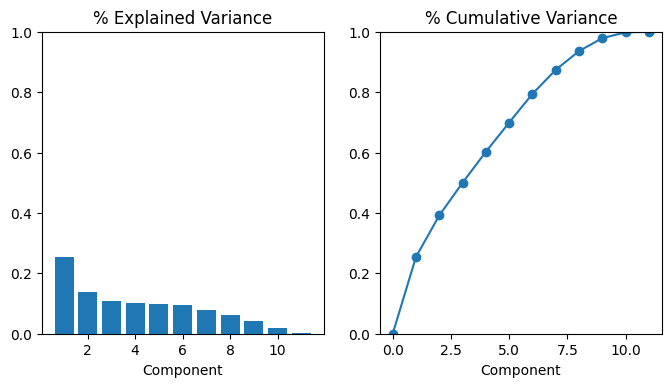

In [42]:
# Look at explained variance
plot_variance(pca)

Which compenents to keep number that represents more that 90 % of information

From 90-95 % from cumulative varience curve its 17-18 PCA compmenent

In [43]:
mi_scores = make_mi_scores(X_pca_train, X_train_model_clusterd['Cluster'], discrete_features=False)
mi_scores

PC1     1.381615
PC11    1.341486
PC2     1.301018
PC3     1.243750
PC7     1.239952
PC4     1.234945
PC5     1.195131
PC6     1.185054
PC8     1.157591
PC9     1.132782
PC10    1.120427
Name: MI Scores, dtype: float64

**Note:**

PCA 1 have most of information about my data but not nessicraly to have Largest MI with the target

When you make MI with Recomendation system that have no target use Cluster Feature as the Target/Label Column

### 3) Select Features have MI > 0.2 or percentile + create new features

In [44]:
y_train.values

array(['My Way (feat. Monty)', 'For You', 'Chop Suey!', ...,
       'Hope We Meet Again (feat. Chris Brown)', 'Get Down',
       'Christmas (Baby Please Come Home)'], dtype=object)

In [45]:
X_pca_train['track_name'] = y_train.values
X_pca_valid['track_name'] = y_valid.values
X_pca_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,track_name
0,-1.713346,-0.608122,-0.810726,-0.917053,-0.022587,0.150899,0.209470,-0.533675,-0.169275,0.463205,-0.019191,My Way (feat. Monty)
1,1.498150,-0.315267,-0.110841,-0.232546,-1.603988,1.597978,1.301859,0.620655,0.257682,0.316783,-0.021975,For You
2,-1.421661,1.147806,0.508055,0.095405,-1.034742,-0.280619,-0.531308,1.416121,0.072877,-0.000304,-0.026184,Chop Suey!
3,-1.853383,1.442150,0.229241,-0.946114,1.473203,0.217755,-0.168214,-0.207889,0.046511,-0.055534,-0.023122,Besitos
4,-0.659000,-0.065930,-1.232195,-0.724984,0.306472,0.105805,-0.369093,-0.701480,-0.044706,-0.154725,-0.021423,Gone Country
...,...,...,...,...,...,...,...,...,...,...,...,...
239663,-1.336925,0.127536,-0.329964,-2.038618,-0.191035,-0.168323,0.111730,-0.126489,0.061404,0.529105,-0.019012,Pickin' Wildflowers
239664,0.257889,0.845882,-0.562845,1.949707,-1.045491,-0.421412,0.261850,0.817449,0.423044,0.459624,-0.027599,Breathe Life
239665,-1.568997,0.365075,-0.125769,-0.573321,-0.370082,0.349591,-0.350267,-0.444168,0.083481,-0.263795,-0.025077,Hope We Meet Again (feat. Chris Brown)
239666,-0.995574,1.348195,-0.687323,0.792199,-2.095140,0.267313,0.701306,-0.089891,-0.378536,-0.055190,-0.036126,Get Down


In [46]:
X_train_model['track_name'] = y_train.values
X_valid_model['track_name'] = y_valid.values
# check range of numerical variable should not be large (not alot of -ve values [use transformation])
# model train +ve values faster and not large ranges also consider manging resources + elpow method for choosing n_cluster
X_train_model

,collaborative,track_duration_ms,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,track_name
120411,0,-0.278179,1.044878,-0.839329,0.894510,0.481036,-0.618374,-0.258948,1.323484,-0.427702,0.331008,My Way (feat. Monty)
201119,0,-1.779648,-0.196776,0.244546,-0.082352,-0.686092,1.254673,-0.446058,-0.425041,-0.910952,-1.804578,For You
208267,0,-0.337941,-1.059036,-0.853779,-1.172656,1.266679,0.373942,-0.471574,1.055979,0.731755,0.302306,Chop Suey!
257191,0,0.697052,0.872426,-0.854513,-1.084423,1.178797,-0.615040,1.220928,1.033127,-0.535281,0.995757,Besitos
104121,0,0.615377,0.803445,-0.361770,0.472254,0.383603,-0.616182,-0.548119,0.377473,-0.910952,0.253365,Gone Country
...,...,...,...,...,...,...,...,...,...,...,...,...
136592,0,-0.890693,0.975897,-0.722171,-0.284026,0.370220,-0.618374,-0.471574,1.243501,-0.837525,1.052578,Pickin' Wildflowers
232422,0,0.666298,-1.231488,-0.844714,0.005881,-0.180417,1.812602,-0.582139,-0.174339,0.800059,-0.544593,Breathe Life
124605,0,-0.117321,-0.093305,-0.807281,0.169742,1.142552,-0.618374,0.038728,0.851654,-0.608707,0.327533,Hope We Meet Again (feat. Chris Brown)
20463,0,-0.186225,-1.231488,-0.829387,0.598301,1.250775,1.812602,-0.505594,0.892318,-0.702625,-0.156061,Get Down


In [47]:
X_train_model.to_csv('X_Train_Encoded_FeatEng_data.csv', index=False)
X_valid_model.to_csv('X_Valid_Encoded_FeatEng_data.csv', index=False)

In [48]:
y_train = X_train_model_clusterd['Cluster'] # cluster of data is the target as we cluster them
y_valid = X_valid_model_clusterd['Cluster']

In [49]:
# Select Features: Not Finished Yet
# X_pca_train = 
# X_pca_valid = 

In [50]:
X_pca_train.to_csv('X_Train_Encoded_FeatEng_data_PCA.csv', index=False)
y_train.to_csv('y_Train_Encoded_FeatEng_data.csv', index=False)
X_pca_valid.to_csv('X_Valid_Encoded_FeatEng_data_PCA.csv', index=False)
y_valid.to_csv('y_Valid_Encoded_FeatEng_data.csv', index=False)

# 4) Pipeline Model

* hyperparameters tunning (random + gridsearch)
* baseline accuracy of model then add features
* bias - varience tradeoff

#### 1) Preprocessing step

In [ ]:
# # Preprocessing for numerical data: already done

# # Preprocessing for categorical data

# categorical_transformer_label = Pipeline(steps=[
#     ('label_encoder', LabelEncoder()),
# ])

# # Bundle preprocessing for numerical then categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('label', categorical_transformer_label, target_label_cols),
#     ])

#### 2) Model

In [ ]:
# model = RandomForestRegressor(n_estimators=100, random_state=0)

#### 3) Pipeline

In [ ]:
# # Bundle preprocessing then modeling code in a pipeline
# my_pipeline = Pipeline(steps=[('preprocessor', preprocessor), # preprocessing
#                               ('scale', StandardScaler()), # standardScaler to columns even target
#                               ('reduce_dims', PCA(n_components=4)), # PCA to 4 features
#                               ('model', model) # model
#                              ])

# # Preprocessing of training data, fit model 
# my_pipeline.fit(X_train_model, y_train)

# # Preprocessing of validation data, get predictions
# preds = my_pipeline.predict(X_valid_model)

# # Evaluate the model
# score = mean_absolute_error(y_valid, preds)
# print('MAE:', score)

In [ ]:
# or

# pipe = Pipeline([
#         ('scale', StandardScaler()),
#         ('reduce_dims', PCA(n_components=4)),
#         ('clf', SVC(kernel = 'linear', C = 1))])

# param_grid = dict(reduce_dims__n_components=[4,6,8],
#                   clf__C=np.logspace(-4, 1, 6),
#                   clf__kernel=['rbf','linear'])

# grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'accuracy')
# grid.fit(X, y) # as X_train and X_valid will be splited already in GridSearchCV
# print(grid.best_score_)
# print(grid.cv_results_)